<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification/blob/main/Data_Visualization_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from GitHub and installing package


The project is hosted on GitHub. Get a copy by running:

In [ ]:
!git clone https://github.com/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification.git

Cloning into 'Dusty-Stellar-Sources-Classification'...
remote: Enumerating objects: 453, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 453 (delta 100), reused 85 (delta 49), pack-reused 280
Receiving objects: 100% (453/453), 65.41 MiB | 6.83 MiB/s, done.
Resolving deltas: 100% (238/238), done.
Updating files: 100% (47/47), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io, requests, zipfile
from zipfile import ZipFile
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score , precision_score , f1_score , classification_report
import warnings
warnings.filterwarnings('ignore')

#Data Pre

In [ ]:
All_star_LMC = pd.read_csv("/content/drive/MyDrive/IPM/Dusty Stellar Sources Classification/Data/LMC_ALL_Star.csv",sep = ';')
All_star_LMC = All_star_LMC.replace('       ',np.nan)
All_star_LMC = All_star_LMC.apply(pd.to_numeric)

In [ ]:
All_star_LMC

,_RAJ2000,_DEJ2000,RAJ2000,DEJ2000,2MASSJ,2MASSH,2MASSKs,IRAC1,IRAC2,IRAC3,IRAC4,IRSFJ,IRSFH,IRSFKs
0,65.047441,-69.534480,65.047441,-69.534480,13.7493,12.8358,12.5977,12.4946,NaN,12.4287,NaN,NaN,NaN,NaN
1,65.160221,-69.378564,65.160221,-69.378564,14.6321,13.7738,13.5568,13.4426,13.5481,13.5872,13.6080,NaN,NaN,NaN
2,65.192170,-69.719720,65.192170,-69.719720,15.5542,14.7705,14.6408,14.5237,14.5543,14.7498,NaN,NaN,NaN,NaN
3,65.192469,-69.660937,65.192469,-69.660937,13.7523,12.9307,12.7567,12.6754,12.7255,12.6779,12.6262,NaN,NaN,NaN
4,65.196116,-69.716709,65.196116,-69.716709,15.1836,14.4238,14.4713,14.2186,14.2523,14.3061,14.2936,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196999,93.873374,-64.195537,93.873374,-64.195537,14.9244,14.3496,14.3012,NaN,14.1660,NaN,NaN,NaN,NaN,NaN
197000,93.874777,-64.050694,93.874777,-64.050694,14.7274,13.9357,13.9289,13.8275,13.8364,13.7894,13.7764,NaN,NaN,NaN
197001,93.898655,-64.122791,93.898655,-64.122791,14.9462,14.1707,13.9869,13.9767,14.0322,14.0177,13.9218,NaN,NaN,NaN
197002,93.900219,-64.152061,93.900219,-64.152061,15.2476,14.5499,14.3184,NaN,14.3610,NaN,14.2104,NaN,NaN,NaN


In [ ]:
All_star_SMC = pd.read_csv("/content/drive/MyDrive/IPM/Dusty Stellar Sources Classification/Data/SMC_ALL_Star.tsv",sep = ';')
All_star_SMC = All_star_SMC.replace('           ',np.nan)
All_star_SMC = All_star_SMC.apply(pd.to_numeric)

In [ ]:
All_star_SMC

,_RAJ2000,_DEJ2000,ID,RAJ2000,DEJ2000,J2mag,H2mag,Ks2mag,IRAC1,IRAC2,IRAC3,IRAC4,MIPS24,JmagIRSF,HmagIRSF,KsmagIRSF,recno
0,3.044541,-73.089456,1,3.044541,-73.089456,15.6192,14.9076,14.9159,14.7756,14.8195,NaN,NaN,NaN,NaN,NaN,NaN,1
1,3.071576,-73.074336,2,3.071576,-73.074336,15.0961,14.4946,14.4176,14.3132,14.3711,14.1227,14.3463,NaN,NaN,NaN,NaN,2
2,3.155707,-73.204226,3,3.155707,-73.204226,15.4699,14.8479,14.7108,14.5661,14.5584,NaN,14.2550,NaN,NaN,NaN,NaN,3
3,3.170525,-73.219597,4,3.170525,-73.219597,14.8145,14.1487,13.9818,13.9560,13.9745,13.8081,13.6623,NaN,NaN,NaN,NaN,4
4,3.174998,-73.129420,5,3.174998,-73.129420,14.5934,13.8668,13.6808,13.6445,13.6442,13.6251,13.7010,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,24.959677,-74.195097,45462,24.959677,-74.195097,14.8802,14.2485,14.1401,14.0664,14.0613,13.9297,14.3417,NaN,14.93,14.27,14.12,45462
45462,24.967559,-73.780651,45463,24.967559,-73.780651,15.9653,15.5467,15.2349,15.2531,15.3146,NaN,14.6832,NaN,NaN,NaN,NaN,45463
45463,24.982427,-74.028186,45464,24.982427,-74.028186,12.0602,11.4156,11.2911,11.2710,11.2892,11.1989,11.1731,NaN,NaN,NaN,NaN,45464
45464,24.987248,-73.226966,45465,24.987248,-73.226966,15.6792,14.9242,14.8968,14.8221,14.7690,14.5840,NaN,NaN,NaN,NaN,NaN,45465


# ALL Sources

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data_General.csv")

In [ ]:
df

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
0,69.338100,-70.579000,NaN,-0.485,-2.258,-4.690,-6.112,-7.032,-7.329,-7.6101,-7.7148,-7.8326,-8.0159,-8.8792,OAGB,DSS
1,69.365300,-67.909700,NaN,NaN,NaN,NaN,-2.497,-3.360,-4.066,-4.5052,-5.0049,-5.4635,-8.3743,-11.4921,GAL,Other
2,71.613100,-68.796300,1.307,1.954,0.325,-2.250,-3.502,-5.238,-6.803,-8.6656,-9.3873,-9.8100,-10.2429,-11.1944,CAGB,DSS
3,71.827700,-69.705700,-1.052,-3.148,-5.010,-7.333,-8.420,-9.248,-9.515,-9.6540,-9.4759,-9.6545,-9.7627,-10.9685,RSG,DSS
4,72.157300,-69.393600,NaN,3.178,2.261,1.023,NaN,NaN,-5.600,-8.1534,-9.0379,-9.8431,-10.6543,-13.6554,YSO,DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,14.488457,-72.654396,-1.593,-0.817,-1.266,-1.993,-3.270,-3.795,-4.912,-6.6860,-7.2730,-8.2610,-9.2260,-15.2890,YSO,DSS
908,14.027887,-72.789808,-1.605,-1.218,-1.578,-2.070,-2.708,-3.195,-3.745,-5.4810,-5.9750,-7.7430,-9.1680,-15.3400,YSO,DSS
909,16.039817,-72.837738,-2.357,-3.880,-5.665,NaN,-8.645,-9.325,-9.593,-9.6990,-9.7110,-9.9220,-10.0500,-10.8040,OAGB,DSS
910,11.378159,-73.082106,-3.551,-2.745,-2.994,-3.054,-3.286,-3.639,-3.984,NaN,-5.3660,-7.2860,-8.7320,-14.7650,HII,Other


In [ ]:
df.isnull().sum()

RAdeg             0
DEdeg             0
Umag            402
Bmag            287
Vmag            287
Imag            366
Jmag            133
Hmag             77
Ksmag            57
[3.6]            81
[4.5]            50
[5.8]            54
[8.0]            87
[24]             92
SpClass           0
GeneralClass      0
dtype: int64

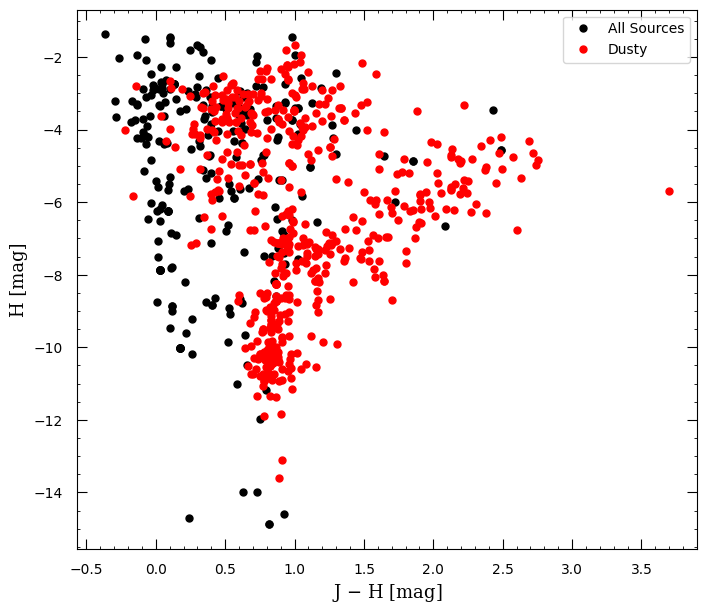

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

# xmax , xmin = 5.5 , -0.5
# ymax , ymin = 19  , 10

# plt.xticks(np.arange(xmin , xmax , step=1))
# plt.yticks(np.arange(ymin , ymax , step=1))
# plt.xlim(xmin, xmax )
# plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J $-$ H [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('H [mag]'          , fontsize = 13, fontname = "serif")

#All
df1 = df[df['GeneralClass'] == 'Other']
df2 = df[df['GeneralClass'] == 'DSS']
plt.plot(df1['Jmag'] - df1['Hmag'], df1['Hmag'] ,'k.', markersize = '10', label = 'All Sources')
plt.plot(df2['Jmag'] - df2['Hmag'], df2['Hmag'] ,'r.', markersize = '10', label = 'Dusty')

plt.legend(loc='upper right')
plt.savefig('CMD_All_nan.png', bbox_inches='tight', dpi = 400)

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['SpClass'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['BSG', 'B[e]', 'C-PN', 'CAGB', 'CPN'], dtype=object)

In [ ]:
X = df[df.columns[2:-2]]
Y = Y['EY']

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state = 0 )
df[df.columns[2:-2]] = imp.fit_transform(df[df.columns[2:-2]])

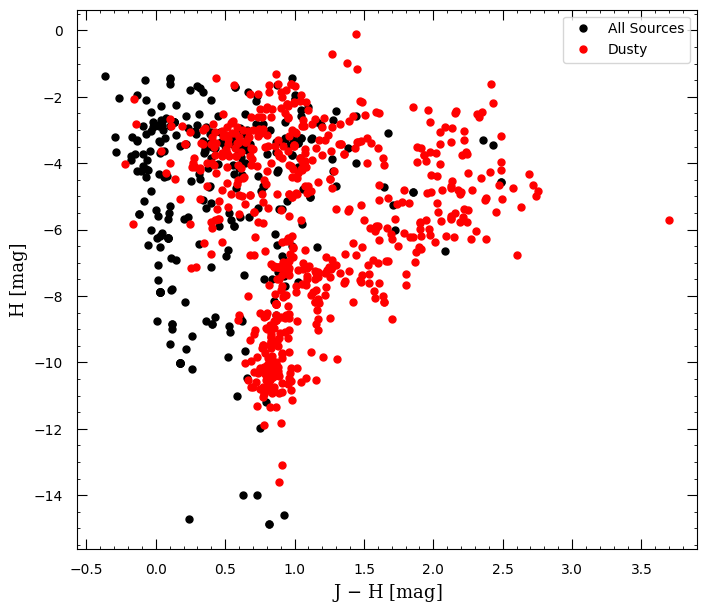

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

# xmax , xmin = 5.5 , -0.5
# ymax , ymin = 19  , 10

# plt.xticks(np.arange(xmin , xmax , step=1))
# plt.yticks(np.arange(ymin , ymax , step=1))
# plt.xlim(xmin, xmax )
# plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J $-$ H [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('H [mag]'          , fontsize = 13, fontname = "serif")

#All
df1 = df[df['GeneralClass'] == 'Other']
df2 = df[df['GeneralClass'] == 'DSS']
plt.plot(df1['Jmag'] - df1['Hmag'], df1['Hmag'] ,'k.', markersize = '10', label = 'All Sources')
plt.plot(df2['Jmag'] - df2['Hmag'], df2['Hmag'] ,'r.', markersize = '10', label = 'Dusty')

plt.legend(loc='upper right')
plt.savefig('CMD_All.png', bbox_inches='tight', dpi = 400)

# Dust Stellar Sources

## CMD: J_K

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data.csv")

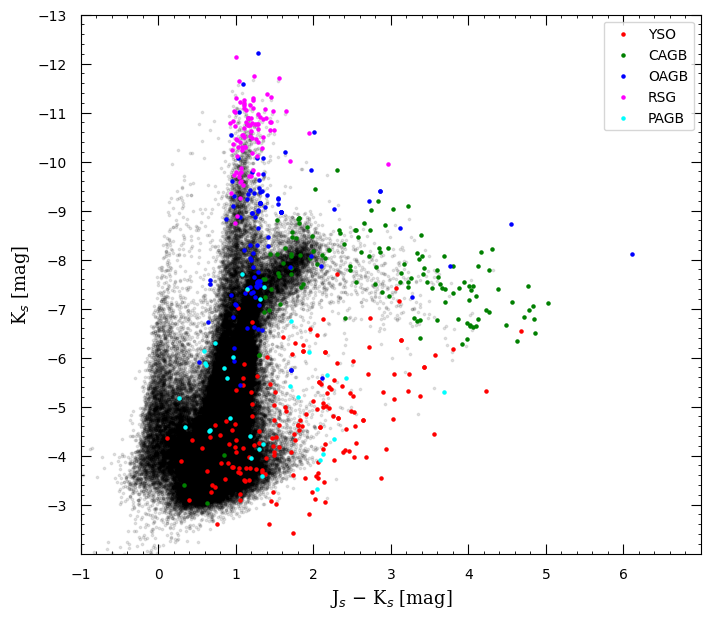

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 7 , -1
ymax , ymin = -2  , -13

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

plt.scatter(All_star_LMC['2MASSJ'] - All_star_LMC['2MASSKs'] , All_star_LMC['2MASSKs'] - 18.47 , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['J2mag'] - All_star_SMC['Ks2mag'], All_star_SMC['Ks2mag'] - 18.89 , s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):
  df_ = df[df['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['Jmag'] - df_['Ksmag'], df_['Ksmag'] , c=colors[i] ,label = SpClass[i] ,s = 5  )



plt.legend(loc='upper right')
plt.savefig('CMD_J_nan.png', bbox_inches='tight', dpi = 400)

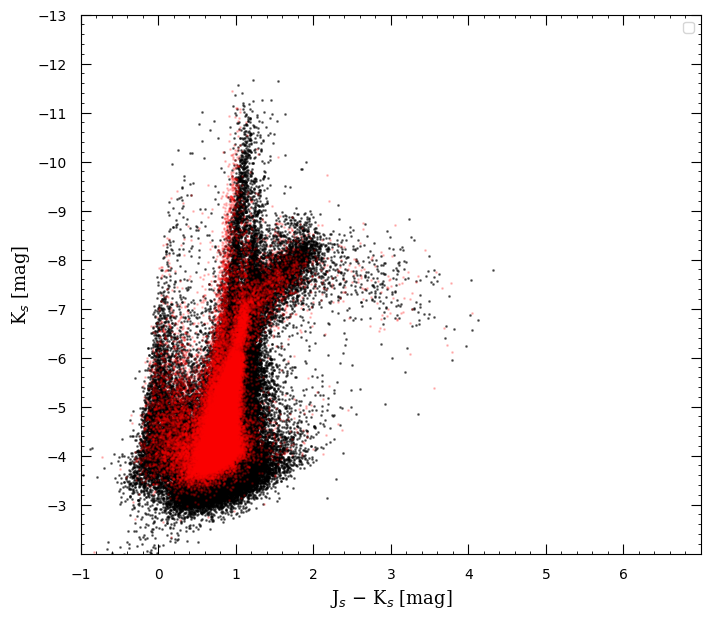

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 7 , -1
ymax , ymin = -2  , -13

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

plt.scatter(All_star_LMC['2MASSJ'] - All_star_LMC['2MASSKs'] , All_star_LMC['2MASSKs'] - 18.47 , s = 1 , c = 'black' , alpha = 0.5 )
plt.scatter(All_star_SMC['J2mag'] - All_star_SMC['Ks2mag'], All_star_SMC['Ks2mag'] - 18.89 , s = 1 , c = 'red' , alpha = 0.2 )

# #DSS
# for i in range(len(SpClass)):
#   df_ = df[df['SpClass'] == SpClass[i]]
#   color_ = colors[i]
#   plt.scatter(df_['Jmag'] - df_['Ksmag'], df_['Ksmag'] , c=colors[i] ,label = SpClass[i] ,s = 5  )



plt.legend(loc='upper right')
plt.savefig('SMC_LMC.png', bbox_inches='tight', dpi = 400)

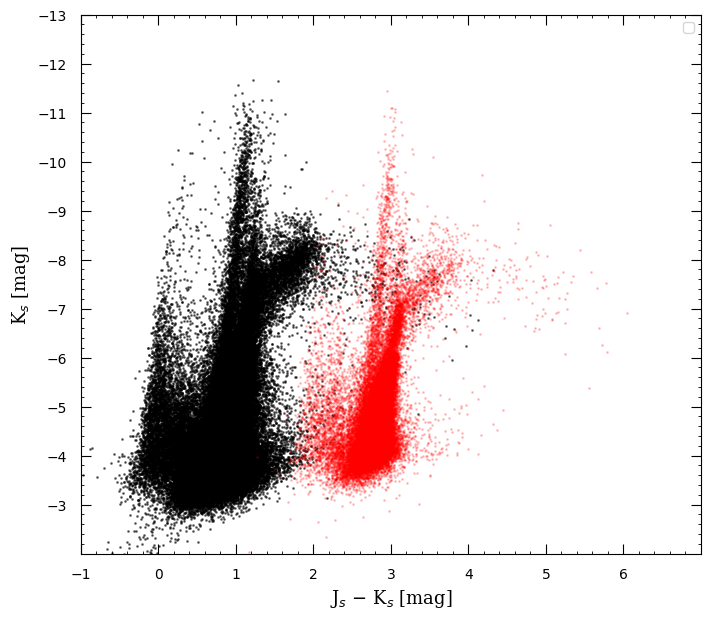

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 7 , -1
ymax , ymin = -2  , -13

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

plt.scatter(All_star_LMC['2MASSJ'] - All_star_LMC['2MASSKs'] , All_star_LMC['2MASSKs'] - 18.47 , s = 1 , c = 'black' , alpha = 0.5 )
plt.scatter(All_star_SMC['J2mag'] - All_star_SMC['Ks2mag'] + 2 , All_star_SMC['Ks2mag'] - 18.89 , s = 1 , c = 'red' , alpha = 0.2 )

# #DSS
# for i in range(len(SpClass)):
#   df_ = df[df['SpClass'] == SpClass[i]]
#   color_ = colors[i]
#   plt.scatter(df_['Jmag'] - df_['Ksmag'], df_['Ksmag'] , c=colors[i] ,label = SpClass[i] ,s = 5  )



plt.legend(loc='upper right')
plt.savefig('SMC_LMC_1.png', bbox_inches='tight', dpi = 400)

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['SpClass'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [ ]:
X = df[df.columns[2:-2]]
Y = Y['EY']

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state = 0 )
df[df.columns[2:-2]] = imp.fit_transform(df[df.columns[2:-2]])

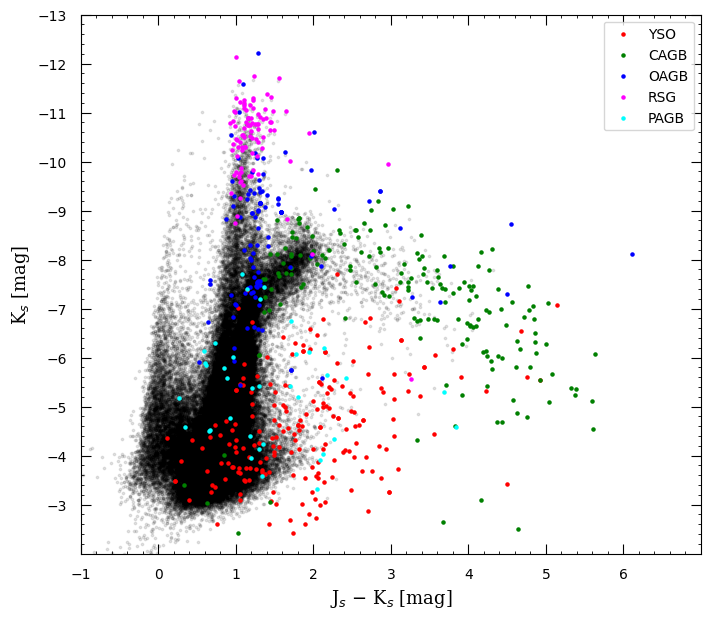

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 7 , -1
ymax , ymin = -2  , -13

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

plt.scatter(All_star_LMC['2MASSJ'] - All_star_LMC['2MASSKs'] , All_star_LMC['2MASSKs'] - 18.47 , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['J2mag'] - All_star_SMC['Ks2mag'], All_star_SMC['Ks2mag'] - 18.89 , s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):
  df_ = df[df['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['Jmag'] - df_['Ksmag'], df_['Ksmag'] , c=colors[i] ,label = SpClass[i] ,s = 5  )

plt.legend(loc='upper right')
plt.savefig('CMD_J.png', bbox_inches='tight', dpi = 400)

## CMD: 3.6 _ 4.5

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data.csv")

In [ ]:
df.isnull().sum()

RAdeg             0
DEdeg             0
Umag            307
Bmag            211
Vmag            211
Imag            282
Jmag             89
Hmag             44
Ksmag            25
[3.6]            46
[4.5]            22
[5.8]            16
[8.0]            36
[24]             30
SpClass           0
GeneralClass      0
dtype: int64

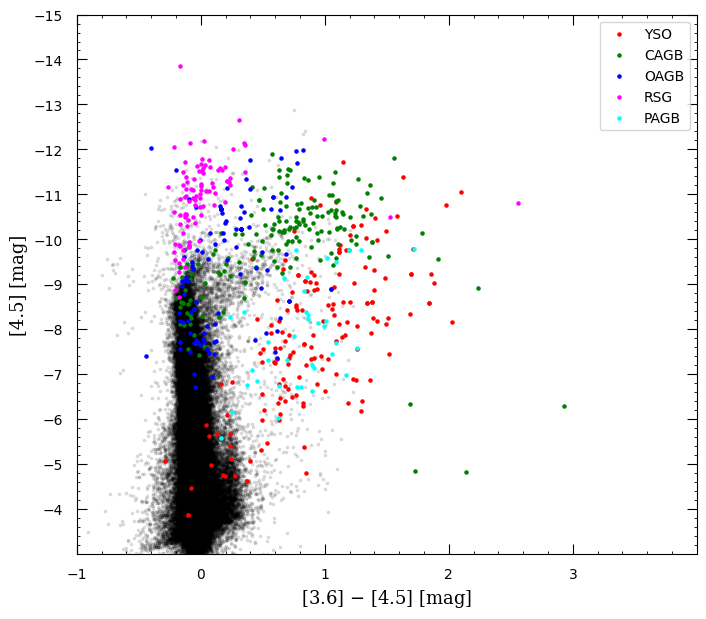

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 4 , -1
ymax , ymin = -3  , -15

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('[3.6] $-$ [4.5] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[4.5] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

plt.scatter(All_star_LMC['IRAC1'] - All_star_LMC['IRAC2'] , All_star_LMC['IRAC2'] - 18.47 , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['IRAC1'] - All_star_SMC['IRAC2'], All_star_SMC['IRAC2'] - 18.89 , s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):
  df_ = df[df['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['[3.6]'] - df_['[4.5]'], df_['[4.5]'] , c=colors[i] ,label = SpClass[i]  ,s = 5 )

plt.legend(loc='upper right')
plt.savefig('CMD_35_nan.png', bbox_inches='tight', dpi = 400)

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['SpClass'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [ ]:
X = df[df.columns[2:-2]]
Y = Y['EY']

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state = 0 )
df[df.columns[2:-2]] = imp.fit_transform(df[df.columns[2:-2]])

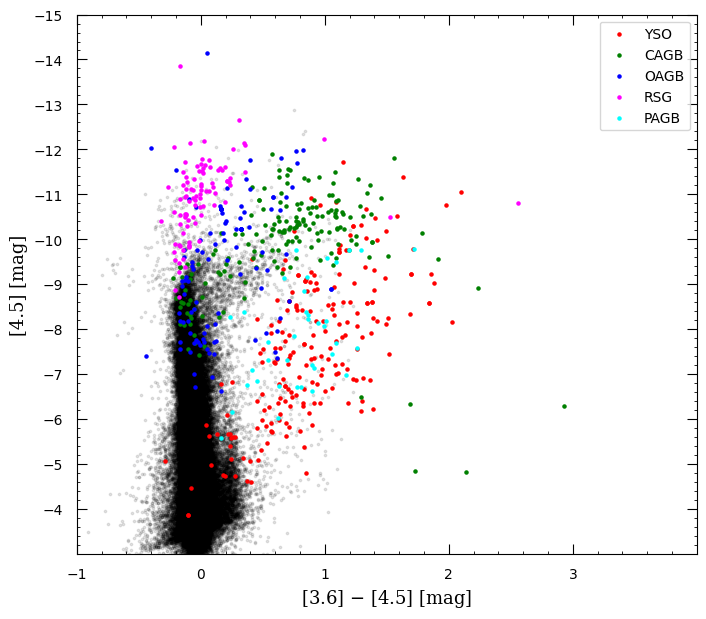

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 4 , -1
ymax , ymin = -3  , -15

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('[3.6] $-$ [4.5] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[4.5] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

plt.scatter(All_star_LMC['IRAC1'] - All_star_LMC['IRAC2'] , All_star_LMC['IRAC2'] - 18.47 , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['IRAC1'] - All_star_SMC['IRAC2'], All_star_SMC['IRAC2'] - 18.89 , s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):
  df_ = df[df['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['[3.6]'] - df_['[4.5]'], df_['[4.5]'] , c=colors[i] ,label = SpClass[i]  ,s = 5 )

plt.legend(loc='upper right')
plt.savefig('CMD_35.png', bbox_inches='tight', dpi = 400)

## CMD with Smote

In [ ]:
AX_train = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Smote_train_data.csv", index_col = 'Unnamed: 0' )

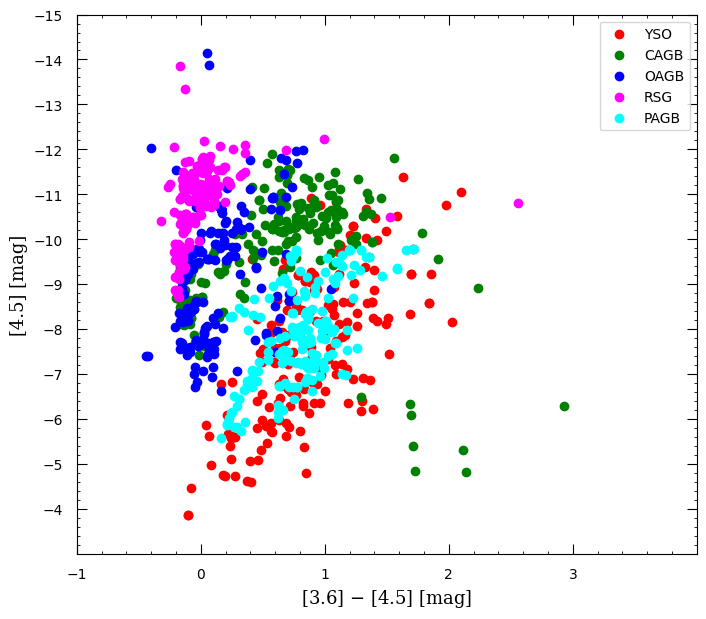

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 4 , -1
ymax , ymin = -3  , -15

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('[3.6] $-$ [4.5] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[4.5] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

#DSS
for i in range(len(SpClass)):
  df_ = AX_train[AX_train['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['[3.6]'] - df_['[4.5]'], df_['[4.5]'] , c=colors[i] ,label = SpClass[i] )

plt.legend(loc='upper right')
plt.savefig('CMD_35_Smote.png', bbox_inches='tight', dpi = 400)

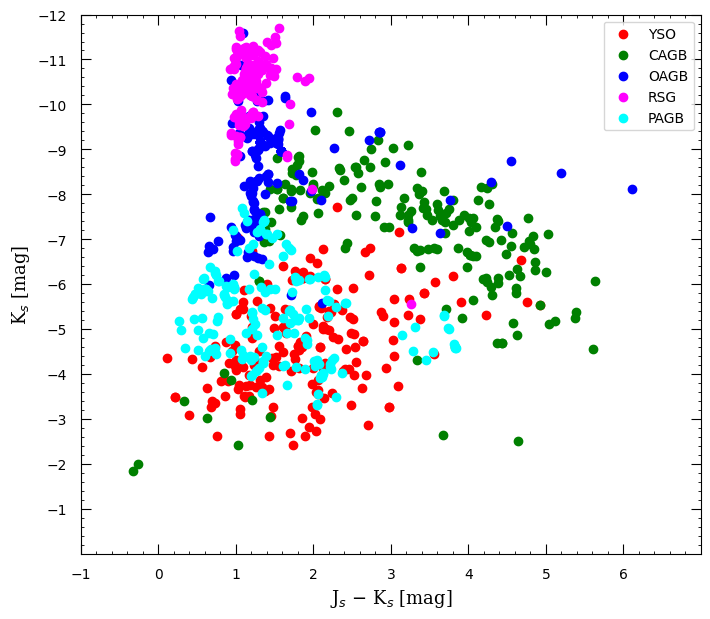

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 7 , -1
ymax , ymin = 0  , -12

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

#DSS
for i in range(len(SpClass)):
  df_ = AX_train[AX_train['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['Jmag'] - df_['Ksmag'], df_['Ksmag'] , c=colors[i] ,label = SpClass[i] )

plt.legend(loc='upper right')
plt.savefig('CMD_J_Smote.png', bbox_inches='tight', dpi = 400)

## Sample Sources

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data.csv")

In [ ]:
df_lmc = df[df['RAdeg']>30]
df_smc = df[df['RAdeg']<30]

(array([ 88.,   0., 136.,   0.,   0.,  72.,   0., 157.,   0.,  33.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

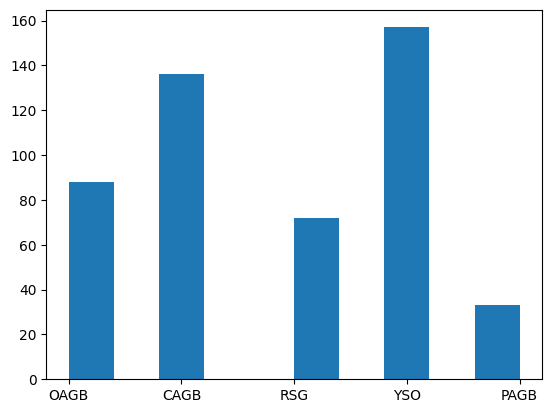

In [ ]:
plt.hist(df_lmc['SpClass'])

(array([49.,  0., 19.,  0.,  0., 38.,  0., 22.,  0.,  4.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

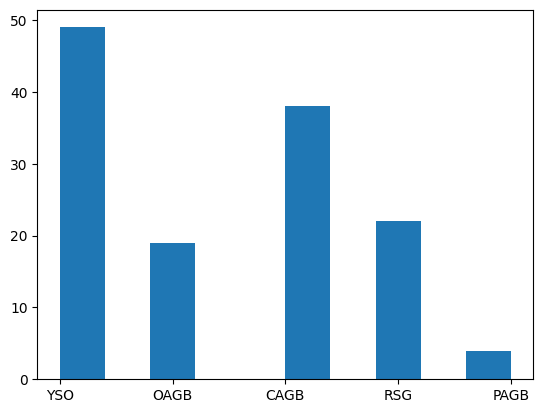

In [ ]:
plt.hist(df_smc['SpClass'])

(array([107.,   0., 174.,   0.,   0.,  94.,   0., 206.,   0.,  37.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

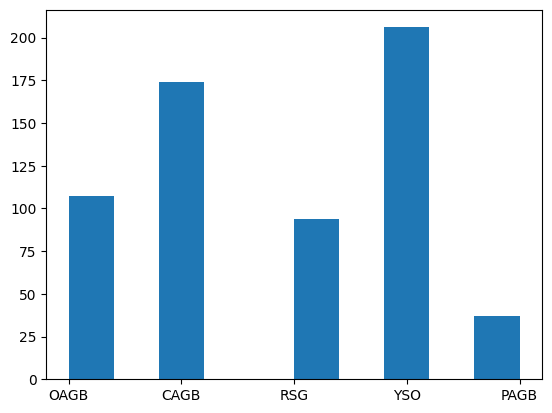

In [ ]:
plt.hist(df['SpClass'])

In [ ]:
df1 = df[1:4]
df1

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
1,71.6131,-68.7963,1.307,1.954,0.325,-2.250,-3.502,-5.238,-6.803,-8.6656,-9.3873,-9.8100,-10.2429,-11.1944,CAGB,DSS
2,71.8277,-69.7057,-1.052,-3.148,-5.010,-7.333,-8.420,-9.248,-9.515,-9.6540,-9.4759,-9.6545,-9.7627,-10.9685,RSG,DSS
3,72.1573,-69.3936,NaN,3.178,2.261,1.023,NaN,NaN,-5.600,-8.1534,-9.0379,-9.8431,-10.6543,-13.6554,YSO,DSS


In [ ]:
df2 = df[607:]
df2

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
607,16.748374,-72.845187,-2.535,-0.869,-2.056,-2.659,-3.202,-4.190,-5.402,-7.600,-8.417,-9.339,-10.337,-13.622,YSO,DSS
608,16.377940,-71.922594,NaN,NaN,NaN,NaN,-2.383,-3.011,-3.715,-5.934,-7.452,-8.941,-10.263,-15.589,YSO,DSS
609,16.280345,-71.995185,-1.550,-1.144,-1.253,NaN,-3.425,-4.226,-5.494,-8.690,-10.182,-11.559,-13.117,-18.183,YSO,DSS
610,15.775990,-72.062044,-1.605,-0.984,-0.859,0.043,NaN,NaN,NaN,-4.537,-4.732,-7.066,NaN,-13.981,YSO,DSS
611,15.382160,-71.844485,NaN,-1.948,-1.624,-2.695,-4.251,-4.026,-4.359,NaN,-5.721,-7.953,-9.631,-16.180,YSO,DSS
612,15.093451,-72.166074,-0.392,0.662,0.147,-0.501,-2.704,-3.355,-3.403,-6.312,-7.340,-8.235,-9.464,-13.690,YSO,DSS
613,14.527078,-72.068717,-0.619,-0.522,-1.027,-1.728,-2.806,-3.214,-3.766,-5.527,-5.660,-8.032,-9.622,-15.645,YSO,DSS
614,14.488457,-72.654396,-1.593,-0.817,-1.266,-1.993,-3.270,-3.795,-4.912,-6.686,-7.273,-8.261,-9.226,-15.289,YSO,DSS
615,14.027887,-72.789808,-1.605,-1.218,-1.578,-2.070,-2.708,-3.195,-3.745,-5.481,-5.975,-7.743,-9.168,-15.340,YSO,DSS
616,16.039817,-72.837738,-2.357,-3.880,-5.665,NaN,-8.645,-9.325,-9.593,-9.699,-9.711,-9.922,-10.050,-10.804,OAGB,DSS


In [ ]:
df3 = df[577:578]
df3

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
577,15.926452,-72.228467,-5.3,-5.165,-5.062,-5.396,-5.893,-6.369,-7.203,-8.991,-9.756,-10.361,-11.423,-13.681,PAGB,DSS


In [ ]:
frames = [df1, df2, df3]
result = pd.concat(frames)

In [ ]:
result= result.round(2)

In [ ]:
result = result.reset_index()

In [ ]:
result

,index,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
0,1,71.61,-68.80,1.31,1.95,0.32,-2.25,-3.50,-5.24,-6.80,-8.67,-9.39,-9.81,-10.24,-11.19,CAGB,DSS
1,2,71.83,-69.71,-1.05,-3.15,-5.01,-7.33,-8.42,-9.25,-9.52,-9.65,-9.48,-9.65,-9.76,-10.97,RSG,DSS
2,3,72.16,-69.39,NaN,3.18,2.26,1.02,NaN,NaN,-5.60,-8.15,-9.04,-9.84,-10.65,-13.66,YSO,DSS
3,607,16.75,-72.85,-2.54,-0.87,-2.06,-2.66,-3.20,-4.19,-5.40,-7.60,-8.42,-9.34,-10.34,-13.62,YSO,DSS
4,608,16.38,-71.92,NaN,NaN,NaN,NaN,-2.38,-3.01,-3.72,-5.93,-7.45,-8.94,-10.26,-15.59,YSO,DSS
5,609,16.28,-72.00,-1.55,-1.14,-1.25,NaN,-3.43,-4.23,-5.49,-8.69,-10.18,-11.56,-13.12,-18.18,YSO,DSS
6,610,15.78,-72.06,-1.61,-0.98,-0.86,0.04,NaN,NaN,NaN,-4.54,-4.73,-7.07,NaN,-13.98,YSO,DSS
7,611,15.38,-71.84,NaN,-1.95,-1.62,-2.69,-4.25,-4.03,-4.36,NaN,-5.72,-7.95,-9.63,-16.18,YSO,DSS
8,612,15.09,-72.17,-0.39,0.66,0.15,-0.50,-2.70,-3.36,-3.40,-6.31,-7.34,-8.24,-9.46,-13.69,YSO,DSS
9,613,14.53,-72.07,-0.62,-0.52,-1.03,-1.73,-2.81,-3.21,-3.77,-5.53,-5.66,-8.03,-9.62,-15.64,YSO,DSS


In [ ]:
result.to_csv('Samples.csv')

# Test data

## CMD: J_K

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Final_test_data.csv")

In [ ]:
df.isnull().sum()

RAJ2000        0
DEJ2000        0
Umag       50125
Bmag       10655
Vmag       10648
Imag       11537
Jmag         187
Hmag         218
Ksmag       2706
[3.6]        306
[4.5]        133
[5.8]        225
[8.0]        303
[24]       39733
Ref            0
Type           0
dtype: int64

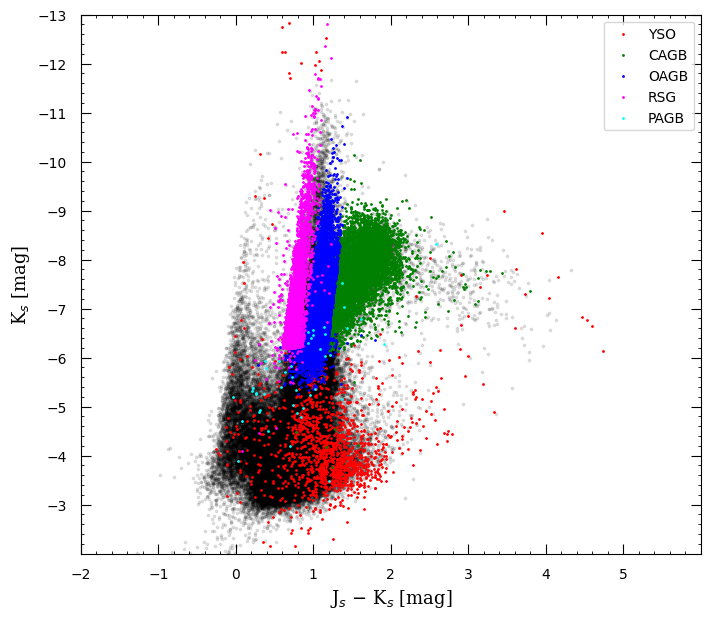

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 6 , -2
ymax , ymin = -2  , -13

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

plt.scatter(All_star_LMC['2MASSJ'] - All_star_LMC['2MASSKs'] , All_star_LMC['2MASSKs'] - 18.47 , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['J2mag'] - All_star_SMC['Ks2mag'], All_star_SMC['Ks2mag'] - 18.89 , s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):
  df_ = df[df['Type'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['Jmag'] - df_['Ksmag'], df_['Ksmag'] , c=colors[i] ,label = SpClass[i] ,s = 1  )

plt.legend(loc='upper right')
plt.savefig('CMD_J_nan.png', bbox_inches='tight', dpi = 400)

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['Type'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [ ]:
X = df[df.columns[2:-2]]
Y = Y['EY']

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state = 0 )
df[df.columns[2:-2]] = imp.fit_transform(df[df.columns[2:-2]])

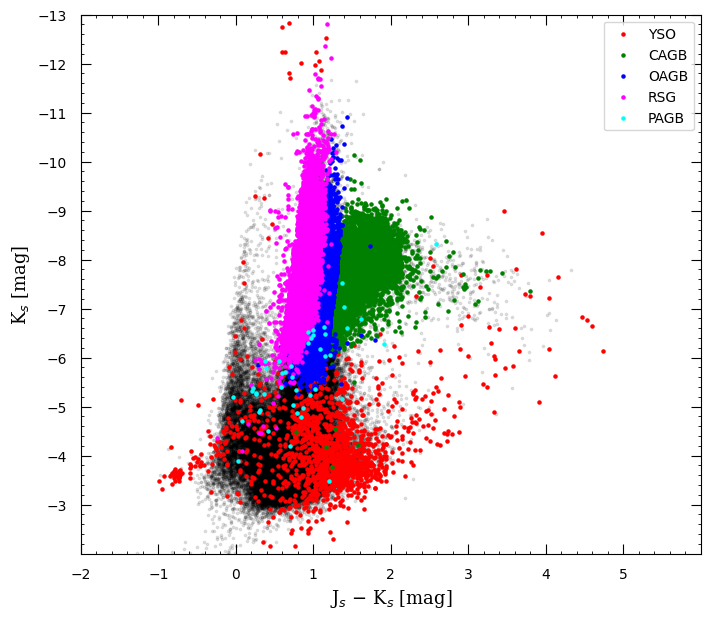

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 6 , -2
ymax , ymin = -2  , -13

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

plt.scatter(All_star_LMC['2MASSJ'] - All_star_LMC['2MASSKs'] , All_star_LMC['2MASSKs'] - 18.47 , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['J2mag'] - All_star_SMC['Ks2mag'], All_star_SMC['Ks2mag'] - 18.89 , s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):
  df_ = df[df['Type'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['Jmag'] - df_['Ksmag'], df_['Ksmag'] , c=colors[i] ,label = SpClass[i] ,s = 5  )

plt.legend(loc='upper right')
plt.savefig('CMD-J.png', bbox_inches='tight', dpi = 400)

## CMD: 3.6 _ 4.5

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Final_test_data.csv")

In [ ]:
df.isnull().sum()

RAJ2000        0
DEJ2000        0
Umag       50125
Bmag       10655
Vmag       10648
Imag       11537
Jmag         187
Hmag         218
Ksmag       2706
[3.6]        306
[4.5]        133
[5.8]        225
[8.0]        303
[24]       39733
Ref            0
Type           0
dtype: int64

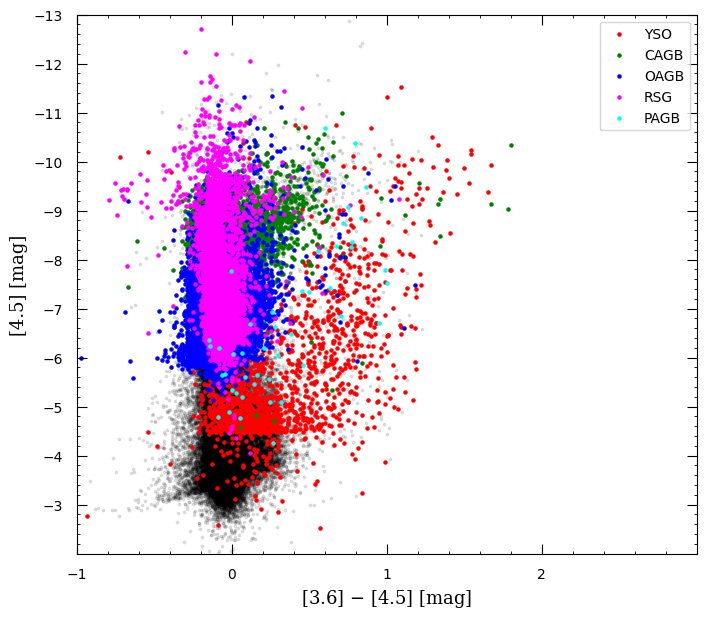

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 3 , -1
ymax , ymin = -2  , -13

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('[3.6] $-$ [4.5] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[4.5] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

plt.scatter(All_star_LMC['IRAC1'] - All_star_LMC['IRAC2'] , All_star_LMC['IRAC2'] - 18.47 , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['IRAC1'] - All_star_SMC['IRAC2'], All_star_SMC['IRAC2'] - 18.89 , s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):
  df_ = df[df['Type'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['[3.6]'] - df_['[4.5]'], df_['[4.5]'] , c=colors[i] ,label = SpClass[i]  ,s = 5 )

plt.legend(loc='upper right')
plt.savefig('CMD_35_nan.png', bbox_inches='tight', dpi = 400)

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['Type'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [ ]:
X = df[df.columns[2:-2]]
Y = Y['EY']

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state = 0 )
df[df.columns[2:-2]] = imp.fit_transform(df[df.columns[2:-2]])

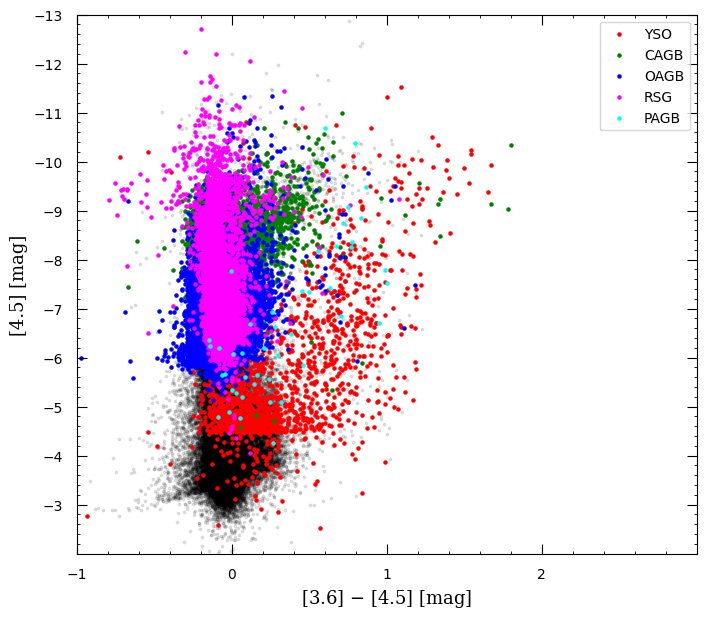

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 3 , -1
ymax , ymin = -2  , -13

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('[3.6] $-$ [4.5] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[4.5] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

plt.scatter(All_star_LMC['IRAC1'] - All_star_LMC['IRAC2'] , All_star_LMC['IRAC2'] - 18.47 , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['IRAC1'] - All_star_SMC['IRAC2'], All_star_SMC['IRAC2'] - 18.89 , s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):
  df_ = df[df['Type'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['[3.6]'] - df_['[4.5]'], df_['[4.5]'] , c=colors[i] ,label = SpClass[i]  ,s = 5 )

plt.legend(loc='upper right')
plt.savefig('CMD_35.png', bbox_inches='tight', dpi = 400)